In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
#read my csv and make DF
path2019 = Path("Resources/daily_aqi_by_county_2019.csv")
data2019 = pd.read_csv(path2019)
aqi2019_df = pd.DataFrame(data2019)
aqi2019_df.head()


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2019-01-03,18,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2019-01-06,35,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2019-01-09,14,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2019-01-12,36,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2019-01-15,38,Good,PM2.5,01-003-0010,1


In [3]:
#filter DF for only NJ info
#aqi2019nj_df = aqi2019_df.query("`State Name`!= 'New Jersey'")
aqi2019nj_df = aqi2019_df[aqi2019_df['State Name'] == 'New Jersey']
aqi2019nj_df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
172477,New Jersey,Atlantic,34,1,2019-01-01,27,Good,PM2.5,34-001-0006,1
172478,New Jersey,Atlantic,34,1,2019-01-02,25,Good,Ozone,34-001-0006,1
172479,New Jersey,Atlantic,34,1,2019-01-03,22,Good,Ozone,34-001-0006,2
172480,New Jersey,Atlantic,34,1,2019-01-04,30,Good,PM2.5,34-001-0006,1
172481,New Jersey,Atlantic,34,1,2019-01-05,25,Good,Ozone,34-001-0006,1


In [4]:
#get avg AQIs of each county for 2019
countyaqigroup_2019=aqi2019nj_df.groupby(by="county Name")
#countyaqigroup_2019['county Name'].unique_values
#print(countyaqigroup_2019['AQI'].mean())
#make above means into df
countyaqi2019_df = pd.DataFrame(countyaqigroup_2019['AQI'].mean())
countyaqi2019_df.reset_index(inplace=True)
countyaqi2019_df.rename(columns={'county Name':'County_Name'}, inplace=True)
countyaqi2019_df.head()

,County_Name,AQI
0,Atlantic,38.567123
1,Bergen,47.619178
2,Camden,47.506849
3,Cumberland,41.703601
4,Essex,43.731507


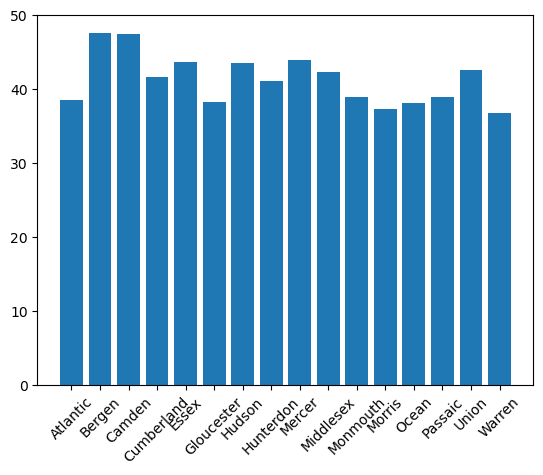

In [5]:
#chart the differences in AQI by county for 2019
plt.bar(countyaqi2019_df["County_Name"],countyaqi2019_df["AQI"])
plt.xticks(rotation=45)
plt.show()

In [7]:
#try to group by parameters by county
parameterCounty2019_group = aqi2019nj_df.groupby(['Defining Parameter', 'county Name'])
#parameterCounty2019_df = pd.DataFrame(countyaqigroup_2019['Defining Parameter'].sort values())
#parameterCounty2019_df = pd.DataFrame(parameterCounty2019_group)
parameterCounty2019_group.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
172477,New Jersey,Atlantic,34,1,2019-01-01,27,Good,PM2.5,34-001-0006,1
172478,New Jersey,Atlantic,34,1,2019-01-02,25,Good,Ozone,34-001-0006,1
172479,New Jersey,Atlantic,34,1,2019-01-03,22,Good,Ozone,34-001-0006,2
172480,New Jersey,Atlantic,34,1,2019-01-04,30,Good,PM2.5,34-001-0006,1
172481,New Jersey,Atlantic,34,1,2019-01-05,25,Good,Ozone,34-001-0006,1
...,...,...,...,...,...,...,...,...,...,...
177638,New Jersey,Warren,34,41,2019-01-12,31,Good,NO2,34-041-0007,1
177639,New Jersey,Warren,34,41,2019-01-13,26,Good,Ozone,34-041-0007,1
177643,New Jersey,Warren,34,41,2019-01-17,27,Good,NO2,34-041-0007,1
177648,New Jersey,Warren,34,41,2019-01-22,35,Good,NO2,34-041-0007,1


In [8]:
parameterCounty2019_mean=parameterCounty2019_group["AQI"].mean()
parameterCounty2019_mean

Defining Parameter  county Name
NO2                 Bergen         42.655172
                    Camden         31.947368
                    Cumberland     29.000000
                    Essex          40.905882
                    Hudson         38.857143
                    Middlesex      31.750000
                    Morris         17.363636
                    Union          36.981651
                    Warren         29.531915
Ozone               Atlantic       37.019084
                    Bergen         51.020833
                    Camden         45.777228
                    Cumberland     40.466418
                    Essex          40.818750
                    Gloucester     39.725664
                    Hudson         41.382353
                    Hunterdon      39.634686
                    Mercer         42.082707
                    Middlesex      42.404858
                    Monmouth       38.962500
                    Morris         37.773134
                    Oce

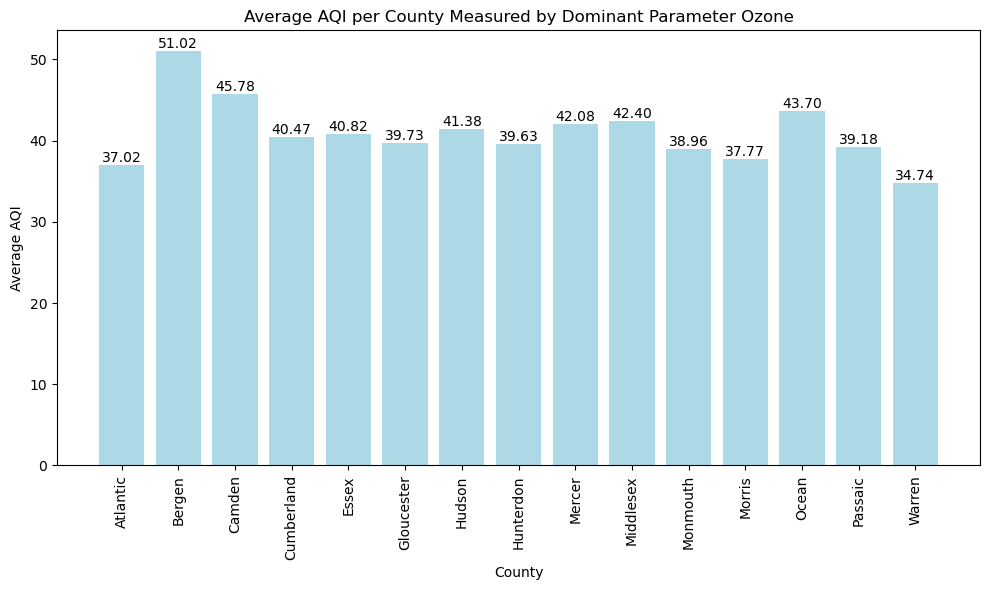

In [13]:
#plot the parameters per county for the year
#plt.bar(parameterCounty2019_mean[['Defining Parameter', 'county Name']],parameterCounty2019_mean['AQI'])
#plt.show()

#ozone per county 2019
county2019_ozone = parameterCounty2019_mean[parameterCounty2019_mean.index.get_level_values(0) == 'Ozone']


fig, ax = plt.subplots(figsize=(10, 6))


bars = ax.bar(range(len(county2019_ozone)), county2019_ozone, color="lightblue", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter Ozone")
ax.set_xticks(range(len(county2019_ozone)))
ax.set_xticklabels(county2019_ozone.index.get_level_values(1), rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}', 
            ha='center', va='bottom')

plt.tight_layout()
plt.show()


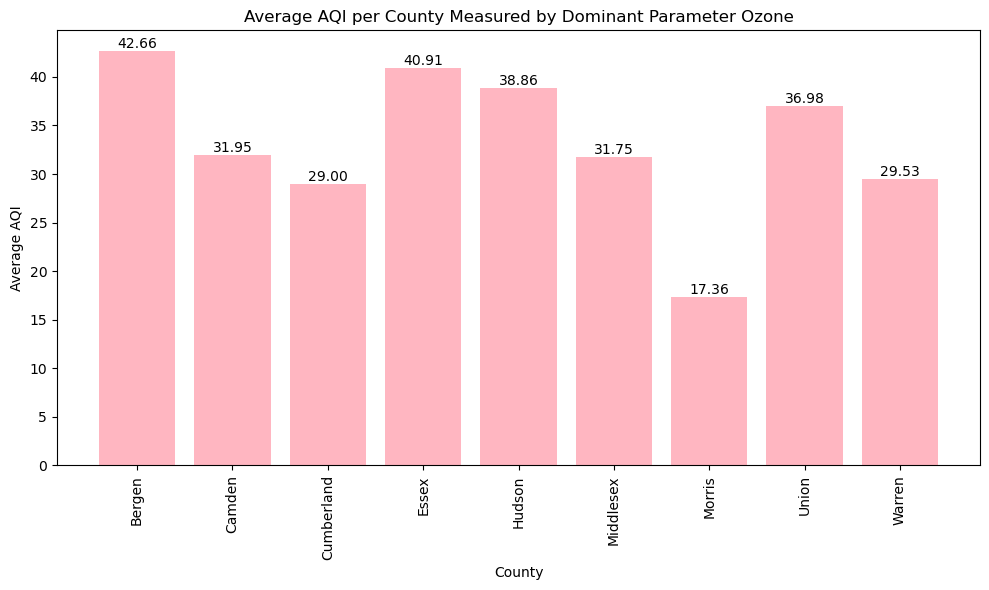

In [14]:
#NO2 per county 2019
county2019_NO2 = parameterCounty2019_mean[parameterCounty2019_mean.index.get_level_values(0) == 'NO2']


fig, ax = plt.subplots(figsize=(10, 6))


bars = ax.bar(range(len(county2019_NO2)), county2019_NO2, color="lightpink", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter Ozone")
ax.set_xticks(range(len(county2019_NO2)))
ax.set_xticklabels(county2019_NO2.index.get_level_values(1), rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}', 
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

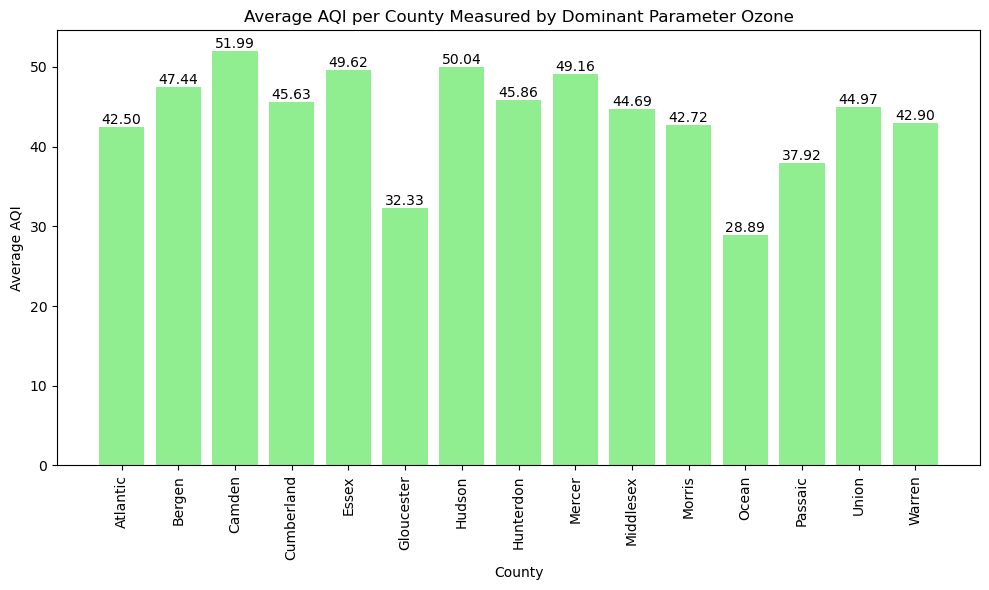

In [15]:
#PM2.5 per county 2019
county2019_PM25 = parameterCounty2019_mean[parameterCounty2019_mean.index.get_level_values(0) == 'PM2.5']


fig, ax = plt.subplots(figsize=(10, 6))


bars = ax.bar(range(len(county2019_PM25)), county2019_PM25, color="lightgreen", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter Ozone")
ax.set_xticks(range(len(county2019_PM25)))
ax.set_xticklabels(county2019_PM25.index.get_level_values(1), rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}', 
            ha='center', va='bottom')

plt.tight_layout()
plt.show()